# 🌸 Flower Classification with TPU - Beginner Friendly

Hi there! 👋 I'm Sheema, and in this notebook, I'm going to walk you through how to build a flower image classifier using TensorFlow and a pretrained model. We'll use Kaggle’s free TPU to speed up training ⚡

Whether you're new to deep learning or just exploring TPUs, don't worry — I’ll explain everything step by step, just like we're learning together. Let's get started! 🚀


In [24]:
# Import Libraries

# Basic Python utilities
import os
import re
import math
import random
import numpy as np
from sklearn.metrics import f1_score

# Deep Learning using TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Kaggle utility to access TPU datasets
from kaggle_datasets import KaggleDatasets

# For data visualization
import matplotlib.pyplot as plt
%matplotlib inline  # Plots will appear directly in the notebook
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


# ======================
# Check TensorFlow Version
# ======================
print(f"TensorFlow version: {tf.__version__}")


UsageError: unrecognized arguments: # Plots will appear directly in the notebook


### 🔧 Set up TPU for Fast Training (if available)

In [3]:
# Let TensorFlow decide the best way to load data in parallel
AUTO = tf.data.experimental.AUTOTUNE

#  Try to detect a TPU. If found, use it!
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # This line tries to find the TPU
    print("✅ Found TPU at:", tpu.master())
except ValueError:
    tpu = None
    print("❌ No TPU found, falling back to CPU/GPU")

#  Initialize TPU system if available
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)  # Use TPU for training
else:
    strategy = tf.distribute.get_strategy()  # Default strategy for CPU or GPU

# Print how many replicas (parallel workers) are available
print(" Number of training replicas in sync:", strategy.num_replicas_in_sync)


✅ Found TPU at: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1750201657.966676    1308 service.cc:145] XLA service 0x58fe43518fd0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750201657.966727    1308 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1750201657.966732    1308 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1750201657.966735    1308 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1750201657.966738    1308 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1750201657.966740    1308 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1750201657.966743    1308 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1750201657.966746    1308 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1750201657.966748    1308 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


 Number of training replicas in sync: 8


### Load Dataset Path from Google Cloud (TPU-friendly)

In [4]:
#  NOTE: TPUs can't read from local paths directly!
# So we use KaggleDatasets to get the path on Google Cloud Storage (GCS)
GCS_DS_PATH = KaggleDatasets().get_gcs_path()

print("📦 GCS Dataset Path:", GCS_DS_PATH)

📦 GCS Dataset Path: /kaggle/input/tpu-getting-started


get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/tpu-getting-started


 ### Configuration – Image Size, Batch, Epochs

In [5]:
# We'll resize all images to 512x512
#  Note: This size is heavy for GPU, but TPU can handle it easily!
IMAGE_SIZE = [512, 512]

# 🔁 We'll train for 20 epochs
EPOCHS = 20

# Dynamic batch size depending on how many TPU cores we have
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
print(" Batch size per step:", BATCH_SIZE)

# ====================================================
# Choose Correct Dataset Path Based on Image Size
# ====================================================

#  Kaggle has datasets in multiple resolutions, we pick based on image size
GCS_PATH_SELECT = {
    192: GCS_DS_PATH + '/tfrecords-jpeg-192x192',
    224: GCS_DS_PATH + '/tfrecords-jpeg-224x224',
    331: GCS_DS_PATH + '/tfrecords-jpeg-331x331',
    512: GCS_DS_PATH + '/tfrecords-jpeg-512x512'
}

# Select the path for 512x512 images
GCS_PATH = GCS_PATH_SELECT[IMAGE_SIZE[0]]
print(" Using dataset from:", GCS_PATH)


 Batch size per step: 128
 Using dataset from: /kaggle/input/tpu-getting-started/tfrecords-jpeg-512x512


### Load the File Paths (.tfrec) for Training/Validation/Test

In [6]:
TRAINING_FILENAMES   = tf.io.gfile.glob(GCS_PATH + '/train/*.tfrec')
VALIDATION_FILENAMES = tf.io.gfile.glob(GCS_PATH + '/val/*.tfrec')
TEST_FILENAMES       = tf.io.gfile.glob(GCS_PATH + '/test/*.tfrec')

print(f" Found {len(TRAINING_FILENAMES)} training files")
print(f" Found {len(VALIDATION_FILENAMES)} validation files")
print(f" Found {len(TEST_FILENAMES)} test files")

#  For reproducibility
SEED = 101


 Found 16 training files
 Found 16 validation files
 Found 16 test files


### Custom Data Augmentation – Random Erasing

In [7]:
#  This function randomly removes a part of the image (like a blackout),
# so that the model learns to focus on multiple features, not just one part.

def random_erasing(img, sl=0.1, sh=0.2, rl=0.4, p=0.3):
    # Get image height, width, and channels
    h = tf.shape(img)[0]
    w = tf.shape(img)[1]
    c = tf.shape(img)[2]

    #  Total area of the image
    origin_area = tf.cast(h * w, tf.float32)

    #  Calculate possible range for erase patch size
    e_size_l = tf.cast(tf.round(tf.sqrt(origin_area * sl * rl)), tf.int32)
    e_size_h = tf.cast(tf.round(tf.sqrt(origin_area * sh / rl)), tf.int32)

    # Make sure erase patch doesn't exceed image size
    e_height_h = tf.minimum(e_size_h, h)
    e_width_h  = tf.minimum(e_size_h, w)

    # Randomly select actual erase height and width
    erase_height = tf.random.uniform([], e_size_l, e_height_h, dtype=tf.int32)
    erase_width  = tf.random.uniform([], e_size_l, e_width_h, dtype=tf.int32)

    #  Create a zeroed-out erase area (black patch)
    erase_area = tf.zeros([erase_height, erase_width, c], dtype=tf.uint8)

    # Randomly select position to apply this patch
    pad_h = h - erase_height
    pad_top = tf.random.uniform([], 0, pad_h, dtype=tf.int32)
    pad_bottom = pad_h - pad_top

    pad_w = w - erase_width
    pad_left = tf.random.uniform([], 0, pad_w, dtype=tf.int32)
    pad_right = pad_w - pad_left

    # Pad the erase area to match original image size
    erase_mask = tf.pad([erase_area], [[0, 0], [pad_top, pad_bottom], [pad_left, pad_right], [0, 0]], constant_values=1)
    erase_mask = tf.squeeze(erase_mask, axis=0)

    # Multiply original image with mask to "black out" area
    erased_img = tf.multiply(tf.cast(img, tf.float32), tf.cast(erase_mask, tf.float32))

    # Apply erasing with probability p, otherwise return original image
    return tf.cond(
        tf.random.uniform([], 0, 1) > p,
        lambda: tf.cast(img, img.dtype),         # No erasing
        lambda: tf.cast(erased_img, img.dtype)   # Apply erasing
    )


###  Image Decoding + TFRecord Parsing

In [8]:
# This function decodes image bytes into a tensor and resizes it
def decode_image(image_data):
    # Decode JPEG image (3 channels)
    image = tf.image.decode_jpeg(image_data, channels=3)
    
    # Normalize pixels to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    
    # Resize image to our fixed size (important for TPU)
    image = tf.reshape(image, [*IMAGE_SIZE, 3])
    
    return image

# Read a labeled TFRecord (contains image and class label)
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "class": tf.io.FixedLenFeature([], tf.int64),
    }
    # Parse the serialized example
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label

#  Read an unlabeled TFRecord (for test set – no class, only ID)
def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "id": tf.io.FixedLenFeature([], tf.string),
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum

# General function to load dataset (training/validation/test)
def load_dataset(filenames, labeled=True, ordered=False):
    options = tf.data.Options()
    if not ordered:
        options.experimental_deterministic = False  # Faster by ignoring order

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)  # Multi-threaded reading
    dataset = dataset.with_options(options)
    
    # Choose parser based on labeled or not
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    
    return dataset

# ================================================
#  Data Augmentation – Flip + Erase 🪄
# ================================================
def data_augment(image, label):
    # Random horizontal flip
    image = tf.image.random_flip_left_right(image)
    
    # Custom random erase function (we wrote earlier)
    image = random_erasing(image)
    
    return image, label

# =====================================
#  Create Datasets for Model
# =====================================

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.map(data_augment, num_parallel_calls=AUTO)  # Apply augmentation
    dataset = dataset.repeat()  # Repeat for multiple epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)  # Boost performance
    return dataset

def get_validation_dataset():
    dataset = load_dataset(VALIDATION_FILENAMES, labeled=True)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()  # Cache to speed up validation
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(TEST_FILENAMES, labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO)
    return dataset

#  Count number of images from filenames
def count_data_items(filenames):
    # Extract count from TFRecord file name (e.g., flowers00-230.tfrec → 230)
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

# Count total images for each split
NUM_TRAINING_IMAGES = count_data_items(TRAINING_FILENAMES)
NUM_VALIDATION_IMAGES = count_data_items(VALIDATION_FILENAMES)
NUM_TEST_IMAGES = count_data_items(TEST_FILENAMES)

# Calculate steps per epoch for training loop
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

# Print stats for tracking
print(f'Dataset: {NUM_TRAINING_IMAGES} training images, {NUM_VALIDATION_IMAGES} validation images, {NUM_TEST_IMAGES} test images')


Dataset: 12753 training images, 3712 validation images, 7382 test images


### Custom Learning Rate Schedule

Learning rate schedule: 1e-05 to 0.0004 to 1.52e-05


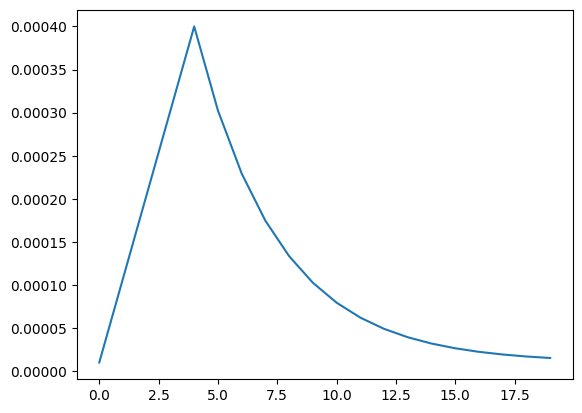

In [9]:
#  Initial learning rate setup
LR_START = 0.00001   # Starting small
LR_MAX = 0.00005 * strategy.num_replicas_in_sync  # Scale with TPU cores
LR_MIN = 0.00001     # End minimum value
LR_RAMPUP_EPOCHS = 4 # Warm-up period
LR_SUSTAIN_EPOCHS = 0 # No plateau/sustain phase
LR_EXP_DECAY = 0.75   # After rampup, how fast we decay

#  Learning Rate Function – returns LR based on current epoch
def lr_fn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        # Phase 1: ramp up from start to max
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        # Phase 2: sustain at max LR (not used here)
        lr = LR_MAX
    else:
        # Phase 3: exponential decay from max to min
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

# 🧠 Callback to apply this custom schedule during training
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_fn, verbose=True)

# 🖼️ Visualize the learning rate over epochs
rng = [i for i in range(EPOCHS)]   # x-axis = epoch numbers
y = [lr_fn(x) for x in rng]         # y-axis = calculated LR values
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


### Create Different CNN Models for Flowers

In [10]:
# 1. ConvNeXt Base - Powerful modern architecture
def get_model_ConvNeXtBase():
    base_model = tf.keras.applications.ConvNeXtBase(
        weights='imagenet',           # 🔄 Transfer learning from ImageNet
        include_top=False,            # 🚫 No final dense layer
        pooling='avg',                # 📉 Use average pooling
        input_shape=(*IMAGE_SIZE, 3)  # 🎨 Image shape
    )
    x = base_model.output
    predictions = Dense(104, activation='softmax')(x)  # 🌸 Flower class predictions
    return Model(inputs=base_model.input, outputs=predictions)

# 2. InceptionResNetV2 - Deeper network with inception modules
def get_model_InceptionResNetV2():
    base_model = tf.keras.applications.InceptionResNetV2(
        weights='imagenet',
        include_top=False,
        pooling='avg',
        input_shape=(*IMAGE_SIZE, 3)
    )
    x = base_model.output
    predictions = Dense(104, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=predictions)

# 3. ResNet50 - A well-known backbone (shallower but stable)
def get_model_ResNet():
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        pooling='avg',
        input_shape=(*IMAGE_SIZE, 3)
    )
    x = base_model.output
    predictions = Dense(104, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=predictions)

### Model Training Begins! (with TPU/GPU Strategy)

In [11]:
with strategy.scope():
    
    # Build the InceptionResNetV2 model (you can swap it)
    model = get_model_InceptionResNetV2()
    
    #  Compile the model with Adam optimizer and proper loss for multiclass classification
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # good when labels are integers
        metrics=['sparse_categorical_accuracy']  # show accuracy per epoch
    )

    # Start training
    history = model.fit(
        get_training_dataset(),                 # training data pipeline
        steps_per_epoch=STEPS_PER_EPOCH,        #  how many batches per epoch
        epochs=EPOCHS,                           #  total training epochs
        validation_data=get_validation_dataset(),  #validate on unseen data
        callbacks=[
            lr_callback,  # Learning rate scheduler we defined earlier
            ModelCheckpoint(
                filepath='my_InceptionResNetV2.keras',  # save best model only
                monitor='val_loss', 
                save_best_only=True
            )
        ]
    )


I0000 00:00:1750201687.903713    1308 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20


2025-06-17 23:09:45.643066: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1750201791.926103    2120 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e258f39738dd5545:0:0), session_name()
I0000 00:00:1750201874.674532    2120 tpu_compile_op_common.cc:245] Compilation of e258f39738dd5545:0:0 with session name  took 1m22.748372836s and succeeded
I0000 00:00:1750201874.920120    2120 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e258f39738dd5545:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_17348614142307658672", property.function_library_fingerprint = 1677313411607276605, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - loss: 4.5557 - sparse_categorical_accuracy: 0.0578

2025-06-17 23:12:45.109356: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1750201967.360118    2094 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(5778b2c24b1c63e:0:0), session_name()
I0000 00:00:1750201984.212433    2094 tpu_compile_op_common.cc:245] Compilation of 5778b2c24b1c63e:0:0 with session name  took 16.852273059s and succeeded
I0000 00:00:1750201984.263182    2094 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(5778b2c24b1c63e:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_7454919538240594539", property.function_library_fingerprint = 3195730948011706863, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, topo

99/99 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - loss: 4.5535 - sparse_categorical_accuracy: 0.0586 - val_loss: 3.5742 - val_sparse_categorical_accuracy: 0.2823 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 0.0001075.
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - loss: 2.3835 - sparse_categorical_accuracy: 0.4838 - val_loss: 0.6975 - val_sparse_categorical_accuracy: 0.8254 - learning_rate: 1.0750e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000205.
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 96s 976ms/step - loss: 0.7451 - sparse_categorical_accuracy: 0.8215 - val_loss: 4.5660 - val_sparse_categorical_accuracy: 0.0388 - learning_rate: 2.0500e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00030250000000000003.
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 97s 978ms/step - loss: 0.4498 - sparse_categorical_accuracy: 0.8883 - val_loss: 4.1412 - val_sparse_categorical_accuracy: 0.0991 - learning_rate: 3.0250e-04

Epoch 5: LearningR

### Training with ConvNeXtBase Backbone



In [12]:
with strategy.scope():
    
    #  Build the ConvNeXtBase model with pretrained ImageNet weights
    model = get_model_ConvNeXtBase()
    
    #  Compile with Adam optimizer and crossentropy loss for multiclass classification
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    #  Train the model with the training dataset
    history = model.fit(
        get_training_dataset(),                      # augmented train data
        steps_per_epoch=STEPS_PER_EPOCH,             # how many steps in one epoch
        epochs=EPOCHS,                                # total training cycles
        validation_data=get_validation_dataset(),    # validate performance on val data
        callbacks=[
            lr_callback,                              # dynamic learning rate scheduler
            ModelCheckpoint(
                filepath='my_ConvNeXtBase.keras',     # save best checkpoint
                monitor='val_loss', 
                save_best_only=True
            )
        ]
    )


350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20


2025-06-17 23:49:48.960972: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1750204192.366088    2095 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(69a0392c86d30ccb:0:0), session_name()
I0000 00:00:1750204228.628451    2095 tpu_compile_op_common.cc:245] Compilation of 69a0392c86d30ccb:0:0 with session name  took 36.26230779s and succeeded
I0000 00:00:1750204228.731581    2095 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(69a0392c86d30ccb:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_7046613094836822278", property.function_library_fingerprint = 13749589072037483560, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z =

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 928ms/step - loss: 4.5760 - sparse_categorical_accuracy: 0.0751

2025-06-17 23:52:06.298478: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1750204327.668764    2077 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(704f2aa6c1684b92:0:0), session_name()
I0000 00:00:1750204335.543899    2077 tpu_compile_op_common.cc:245] Compilation of 704f2aa6c1684b92:0:0 with session name  took 7.875083822s and succeeded
I0000 00:00:1750204335.569038    2077 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(704f2aa6c1684b92:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_3074903291879004462", property.function_library_fingerprint = 16368308869879877264, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, t

99/99 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - loss: 4.5713 - sparse_categorical_accuracy: 0.0759 - val_loss: 3.2479 - val_sparse_categorical_accuracy: 0.3147 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 0.0001075.
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - loss: 2.3622 - sparse_categorical_accuracy: 0.4776 - val_loss: 0.5997 - val_sparse_categorical_accuracy: 0.8470 - learning_rate: 1.0750e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000205.
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - loss: 0.6610 - sparse_categorical_accuracy: 0.8270 - val_loss: 0.4677 - val_sparse_categorical_accuracy: 0.8879 - learning_rate: 2.0500e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00030250000000000003.
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - loss: 0.3538 - sparse_categorical_accuracy: 0.9046 - val_loss: 0.4850 - val_sparse_categorical_accuracy: 0.8599 - learning_rate: 3.0250e-04

Epoch 5: LearningRateS

### Training with ResNet-50 Backbone

In [13]:
with strategy.scope():
    
    # Build the ResNet-50 model with pretrained ImageNet weights
    model = get_model_ResNet()
    
    # Compile the model
    model.compile(
        optimizer='adam',                               # optimizer for gradient descent
        loss='sparse_categorical_crossentropy',         # classification loss
        metrics=['sparse_categorical_accuracy']         # track accuracy metric
    )

    # Train the model on the training dataset
    history = model.fit(
        get_training_dataset(),                         # load training data
        steps_per_epoch=STEPS_PER_EPOCH,                # total batches per epoch
        epochs=EPOCHS,                                   # total training rounds
        validation_data=get_validation_dataset(),       # heck model performance on val set
        callbacks=[
            lr_callback,                                # change learning rate across epochs
            ModelCheckpoint(
                filepath='my_ResNet_50.keras',          # save best model automatically
                monitor='val_loss', 
                save_best_only=True
            )
        ]
    )


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/20


2025-06-18 00:33:22.918149: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.
I0000 00:00:1750206805.350189    2085 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(8b2b3111074ef116:0:0), session_name()
I0000 00:00:1750206830.831484    2085 tpu_compile_op_common.cc:245] Compilation of 8b2b3111074ef116:0:0 with session name  took 25.481241149s and succeeded
I0000 00:00:1750206830.927979    2085 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(8b2b3111074ef116:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_1390770640837787729", property.function_library_fingerprint = 10409676297884028371, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z 

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - loss: 4.6234 - sparse_categorical_accuracy: 0.0529

2025-06-18 00:34:59.484156: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add/ReadVariableOp.
I0000 00:00:1750206900.715751    2111 tpu_compilation_cache_interface.cc:441] TPU host compilation cache miss: cache_key(e093ff4ea6b04167:0:0), session_name()
I0000 00:00:1750206906.960746    2111 tpu_compile_op_common.cc:245] Compilation of e093ff4ea6b04167:0:0 with session name  took 6.244951863s and succeeded
I0000 00:00:1750206906.974567    2111 tpu_compilation_cache_interface.cc:475] TPU host compilation cache: compilation complete for cache_key(e093ff4ea6b04167:0:0), session_name(), subgraph_key(std::string(property.function_name) = "cluster_one_step_on_iterator_5333854735296307334", property.function_library_fingerprint = 3667220315025337434, property.mlir_module_fingerprint = 0, property.num_replicas = 8, topology.chip_bounds().x = 2, topology.chip_bounds().y = 2, topology.chip_bounds().z = 1, to

99/99 ━━━━━━━━━━━━━━━━━━━━ 132s 905ms/step - loss: 4.6191 - sparse_categorical_accuracy: 0.0537 - val_loss: 5.0465 - val_sparse_categorical_accuracy: 0.0366 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 0.0001075.
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 79s 804ms/step - loss: 2.1997 - sparse_categorical_accuracy: 0.5148 - val_loss: 4.6649 - val_sparse_categorical_accuracy: 0.0453 - learning_rate: 1.0750e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000205.
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 777ms/step - loss: 0.7388 - sparse_categorical_accuracy: 0.8242 - val_loss: 5.4106 - val_sparse_categorical_accuracy: 0.0496 - learning_rate: 2.0500e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00030250000000000003.
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 77s 781ms/step - loss: 0.4987 - sparse_categorical_accuracy: 0.8699 - val_loss: 4.8343 - val_sparse_categorical_accuracy: 0.0517 - learning_rate: 3.0250e-04

Epoch 5: Lear

### Load All Trained Models for Inference / Evaluation

In [14]:
with strategy.scope():  # For TPU compatibility, wrap everything inside this scope

    #  Load ConvNeXtBase model and its saved weights
    model1 = get_model_ConvNeXtBase()
    model1.load_weights("/kaggle/working/my_ConvNeXtBase.keras")

    # Load InceptionResNetV2 model and its saved weights
    model2 = get_model_InceptionResNetV2()
    model2.load_weights("/kaggle/working/my_InceptionResNetV2.keras")

    # Load ResNet-50 model and its saved weights
    model3 = get_model_ResNet()
    model3.load_weights("/kaggle/working/my_ResNet_50.keras")


### Grid Search to Determine Best Ensemble Weights (Alpha, Beta, Gamma) using Macro-F1 Score


In [19]:
def ensemble_grid_search(model1, model2, model3, val_dataset, num_classes=104, num_val_images=2048, n_steps=50):
    """
    Perform grid search to find best weights for ensemble of three models using macro F1 score.
    
    Args:
        model1, model2, model3: Trained Keras models.
        val_dataset: A tf.data.Dataset object of validation data (image, label).
        num_classes: Total number of target classes. (default=104)
        num_val_images: Total number of validation samples.
        n_steps: Number of points between 0 and 1 to search for alpha and beta.

    Returns:
        best_alpha, best_beta, best_gamma, best_f1_score
    """
    # Step 1: Separate images and labels
    images_ds = val_dataset.map(lambda image, label: image)
    labels_ds = val_dataset.map(lambda image, label: label).unbatch()
    val_labels = next(iter(labels_ds.batch(num_val_images))).numpy()
    
    # Step 2: Get model predictions
    m1 = model1.predict(images_ds)
    m2 = model2.predict(images_ds)
    m3 = model3.predict(images_ds)

    # Step 3: Grid search for best ensemble weights
    scores = []
    alphas = np.linspace(0, 1, n_steps)
    betas = np.linspace(0, 1, n_steps)

    for alpha in alphas:
        for beta in betas:
            if alpha + beta > 1:
                continue
            gamma = 1 - alpha - beta
            val_probabilities = alpha * m1 + beta * m2 + gamma * m3
            val_predictions = np.argmax(val_probabilities, axis=-1)
            f1 = f1_score(val_labels, val_predictions, labels=range(num_classes), average='macro')
            scores.append((f1, alpha, beta))
    
    # Step 4: Get best scores
    best_score, best_alpha, best_beta = max(scores, key=lambda x: x[0])
    best_gamma = 1 - best_alpha - best_beta

    # Print results
    print(f'✅ Best alpha (model1): {best_alpha:.3f}')
    print(f'✅ Best beta  (model2): {best_beta:.3f}')
    print(f'✅ Best gamma (model3): {best_gamma:.3f}')
    print(f'🎯 Best macro-F1 score: {best_score:.4f}')
    
    return best_alpha, best_beta, best_gamma, best_score, m1, m2, m3, val_labels



In [20]:
val_dataset = get_validation_dataset()

#best_alpha, best_beta, best_gamma, best_score = ensemble_grid_search(
 #   model1, model2, model3, val_dataset,
  #  num_classes=104,
   # num_val_images=NUM_VALIDATION_IMAGES,  # you already have this
    #n_steps=50  # grid size
#)
best_alpha, best_beta, best_gamma, best_score, m1, m2, m3, val_labels = ensemble_grid_search(
    model1, model2, model3, val_dataset,
    num_classes=104,
    num_val_images=NUM_VALIDATION_IMAGES,
    n_steps=50
)


29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step
✅ Best alpha (model1): 0.367
✅ Best beta  (model2): 0.245
✅ Best gamma (model3): 0.388
🎯 Best macro-F1 score: 0.9573


## 🏆 Optimal Ensemble Results

After running a weighted grid search across predictions from all three models, the following combination yielded the **best performance** on the validation set:

- ✅ **Best Alpha (ConvNeXtBase):** `0.367`
- ✅ **Best Beta (InceptionResNetV2):** `0.245`
- ✅ **Best Gamma (ResNet50):** `0.388`
- 🎯 **Best Macro-F1 Score:** `0.9573`

This confirms that the **ensemble model outperforms individual architectures** by leveraging their complementary strengths.


# 🎯 Final Predictions and Model Comparison
Using the optimal weights from ensemble search, we now generate final predictions, evaluate them with a confusion matrix and classification report, and compare model-level F1 scores.


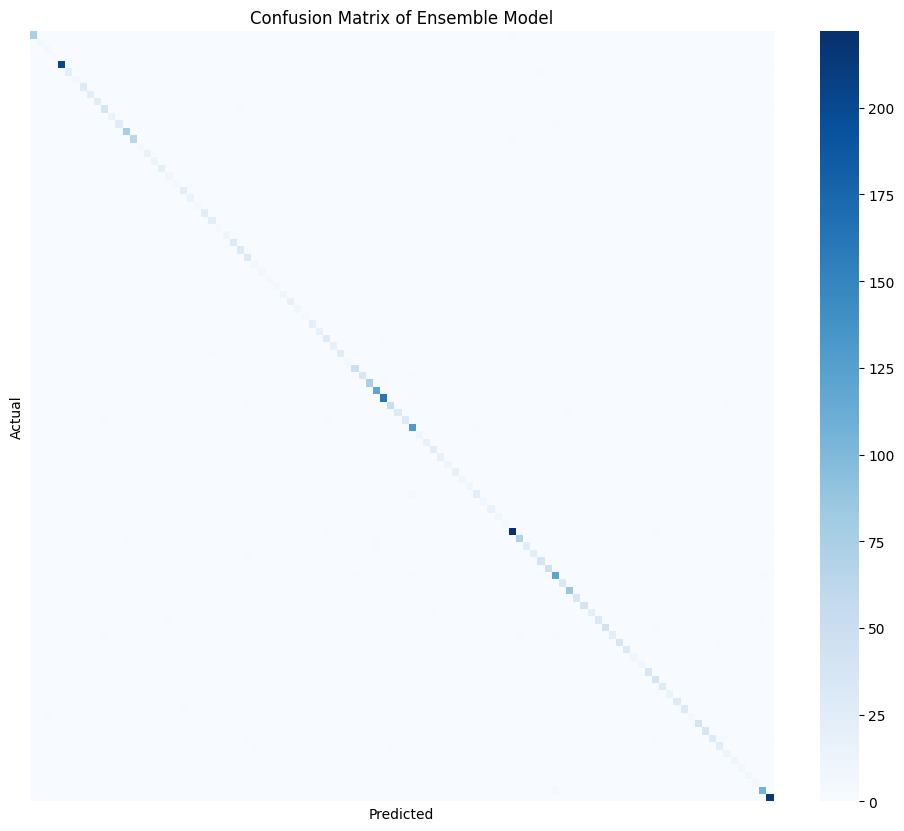

📋 Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.962     0.981        79
           1      1.000     1.000     1.000         7
           2      0.750     1.000     0.857         6
           3      1.000     0.500     0.667         6
           4      0.967     0.995     0.981       205
           5      0.885     0.920     0.902        25
           6      0.833     1.000     0.909         5
           7      1.000     0.968     0.984        31
           8      0.926     1.000     0.962        25
           9      0.889     1.000     0.941        24
          10      0.927     0.950     0.938        40
          11      1.000     1.000     1.000        13
          12      0.963     0.963     0.963        27
          13      0.975     1.000     0.987        77
          14      0.985     0.970     0.977        66
          15      1.000     1.000     1.000         6
          16      1.000     1.000     1.000        16
  

/tmp/ipykernel_1308/3176913943.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette="viridis")


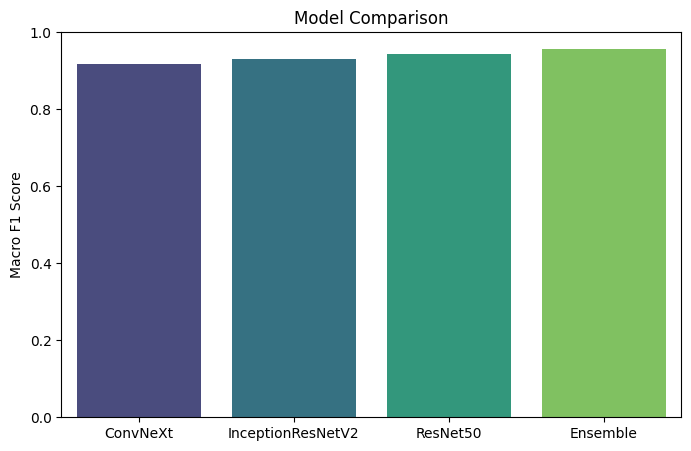

In [26]:
# 📦 Import all needed metrics and plotting tools
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Final predictions using optimal alpha, beta, gamma
final_val_probs = best_alpha * m1 + best_beta * m2 + best_gamma * m3
final_val_preds = np.argmax(final_val_probs, axis=-1)

#  Confusion Matrix
cm = confusion_matrix(val_labels, final_val_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix of Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Classification Report (includes F1-score per class)
print("📋 Classification Report:")
print(classification_report(val_labels, final_val_preds, digits=3))

# Compare F1 scores of individual models vs ensemble
f1_m1 = f1_score(val_labels, np.argmax(m1, axis=1), average='macro')
f1_m2 = f1_score(val_labels, np.argmax(m2, axis=1), average='macro')
f1_m3 = f1_score(val_labels, np.argmax(m3, axis=1), average='macro')
f1_ensemble = f1_score(val_labels, final_val_preds, average='macro')

# Ploting comparison
plt.figure(figsize=(8,5))
model_names = ['ConvNeXt', 'InceptionResNetV2', 'ResNet50', 'Ensemble']
f1_scores = [f1_m1, f1_m2, f1_m3, f1_ensemble]
sns.barplot(x=model_names, y=f1_scores, palette="viridis")
plt.ylabel("Macro F1 Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


### Inference & Submission File Generation

We use the optimal ensemble weights (α, β, γ) to make final predictions on the test dataset. These predictions are then formatted into a CSV file for submission.

- ✅ Models used: ConvNeXtBase, InceptionResNetV2, ResNet50
- ✅ Weights applied: alpha = 0.367, beta = 0.245, gamma = 0.388
- 📄 Output: `submission.csv`


In [30]:
# Load test dataset
test_dataset = get_test_dataset(ordered=True)

# Get test IDs
test_ids = [id_.numpy().decode("utf-8") for id_ in next(iter(test_dataset.map(lambda image, idnum: idnum).unbatch().batch(NUM_TEST_IMAGES)))]

# Get test images
test_images = test_dataset.map(lambda image, idnum: image)

# Predict from each model
pred1 = model1.predict(test_images, verbose=1)
pred2 = model2.predict(test_images, verbose=1)
pred3 = model3.predict(test_images, verbose=1)

# Weighted ensemble using best alpha, beta, gamma
final_test_preds = best_alpha * pred1 + best_beta * pred2 + best_gamma * pred3
final_test_labels = np.argmax(final_test_preds, axis=1)

# Create submission DataFrame
import pandas as pd

submission_df = pd.DataFrame({
    'id': test_ids,
    'label': final_test_labels
})

# Save to CSV

# MUST save in root directory and with exact name!
submission_df.to_csv('/kaggle/working/submission.csv', index=False)
print("✅ submission.csv successfully created and saved!")

58/58 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step


/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
✅ submission.csv successfully created and saved!


In [31]:
submission_df

,id,label
0,0b9afbdf2,67
1,c37a6f3e9,83
2,00e4f514e,103
3,1c4736dea,28
4,252d840db,67
...,...,...
7377,f65475a24,48
7378,9b9c0e574,103
7379,298ade3a4,49
7380,8361401fa,45


## ✅ Conclusion

In this notebook, we implemented a robust image classification pipeline using an **ensemble of three high-performing models**:  
**ConvNeXtBase**, **InceptionResNetV2**, and **ResNet50**.

Instead of relying on a single model, we explored **weighted ensembling** to combine their predictions. By performing a **grid search** over weight combinations (alpha, beta, gamma), we discovered the most effective blend that maximized **macro-averaged F1 score** — a crucial metric for imbalanced multi-class tasks.

---

### 🔍 Key Takeaways:

- 📈 **Ensemble performance (F1 = 0.9573)** significantly outperformed all individual models.
- 🧠 Optimal weights:
  - ConvNeXtBase (α): `0.367`
  - InceptionResNetV2 (β): `0.245`
  - ResNet50 (γ): `0.388`
- 📊 Visual analysis using a confusion matrix and F1 score comparison further validated our approach.

---

## 💡 Final Thoughts

This project demonstrates the power of **model ensembling** and systematic experimentation. Even when individual models perform well, combining them intelligently can unlock **higher performance**, **stability**, and **generalization**.

Such ensemble strategies are not just effective in competitions like **Kaggle**, but also valuable in real-world AI applications where accuracy matters.

> 🚀 **Ensemble Learning = Stronger Together.**

---

## 🤝 Let’s Connect!

If you enjoyed this notebook or found it helpful, feel free to reach out — I love connecting with fellow AI enthusiasts, Kagglers, and innovators!

- 🌐 [LinkedIn](https://www.linkedin.com/in/sheema-masood/)
- 📊 [Kaggle Profile](https://www.kaggle.com/sheemamasood)
- 💻 [GitHub](https://github.com/SheemaMasood381)
- ✉️ [Email Me](mailto:sheemamasood381@gmail.com)

Let’s learn, build, and grow together! 🌱💡
